<a href="https://colab.research.google.com/github/nakaroov/-ENEM/blob/main/ENEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BIBLIOTECAS USADAS**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np #cálculos em Arrays Multidimensionais

# **DATAFRAME**


* Arquivos ENEM
* Dataframe com Latitude/Longitude de cada cidade
* Variaveis para auxilio de Analise

In [ ]:
ENEM = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2015.csv', dtype={"NU_RENDA_FAMILIAR": "category"})
ENEM16 = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2016.csv',dtype={"NU_RENDA_FAMILIAR": "category"})
ENEM17 = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2017.csv',dtype={"NU_RENDA_FAMILIAR": "category"})
ENEM18 = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2018.csv',dtype={"NU_RENDA_FAMILIAR": "category"})
ENEM19 = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2019.csv',dtype={"NU_RENDA_FAMILIAR": "category"})

DATAFRAME PARA COM LATITUDE E LONGTITUDE PARA GERAR MAPAS

In [ ]:
site = 'https://github.com/kelvins/Municipios-Brasileiros/blob/main/csv/municipios.csv?raw=true'

coordenadas = pd.read_csv(site)
coordenadas['nome'] = coordenadas['nome'].str.upper()
coordenadas

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,ABADIA DE GOIÁS,-16.75730,-49.4412,0,52
1,3100104,ABADIA DOS DOURADOS,-18.48310,-47.3916,0,31
2,5200100,ABADIÂNIA,-16.19700,-48.7057,0,52
3,3100203,ABAETÉ,-19.15510,-45.4444,0,31
4,1500107,ABAETETUBA,-1.72183,-48.8788,0,15
...,...,...,...,...,...,...
5565,2933604,XIQUE-XIQUE,-10.82300,-42.7245,0,29
5566,2517407,ZABELÊ,-8.07901,-37.1057,0,25
5567,3557154,ZACARIAS,-21.05060,-50.0552,0,35
5568,2114007,ZÉ DOCA,-3.27014,-45.6553,0,21


In [ ]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC"]
criterios = ["NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5", 'NU_NOTA_REDACAO']
criterios2 = ["NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"]
presenca = ["TP_PRESENCA_CN","TP_PRESENCA_CH","TP_PRESENCA_MT","TP_PRESENCA_LC", "CARRO"]
questoes = ['Q003',	'Q004',	'Q006',	'Q024',	'Q025']
raça = ['Não Declarado','Branca','Preta', 'Parda','Amarela','Indigena']
city = ['MUNICIPIO','LOCALPROVA']
renda = ['NU_RENDA_FAMILIAR']
redacao = ["NU_NOTA_REDACAO"]
escola = ['TP_ESCOLA']
ano = ['NU_ANO', 'TP_COR_RACA']

#FUNÇÕES UTILIZADAS

In [ ]:
def cidade(Enem, cidade):
  MOCOCA = Enem.query(cidade) # GERAL
  MOCOCA = MOCOCA[city + provas + criterios + presenca ]
  MOCOCA = MOCOCA.query("NU_NOTA_CN>0")
  MOCOCA = MOCOCA.query("NU_NOTA_CH>0")
  MOCOCA = MOCOCA.query("NU_NOTA_MT>0")
  MOCOCA = MOCOCA.query("NU_NOTA_LC>0")
  print(len(MOCOCA))
  return MOCOCA

In [ ]:
def cidadeGeral(Enem, cidade):
  MOCOCA = Enem.query(cidade) # GERAL
  MOCOCA = MOCOCA[city + provas + criterios + presenca]
  print(len(MOCOCA))
  return MOCOCA

In [ ]:
def plot(data,E2,dis):
  data[dis].hist(bins = 25, figsize=(15, 10))
  media = E2[dis].mean()
  moda = E2[dis].mode()[0]
  Mmedia = data[dis].mean()
  Mmoda = data[dis].mode()[0]
  plt.axvline(media, c='r', label="Media") 
  plt.axvline(moda, c='g', label="Moda") 
  plt.axvline(Mmedia, c='darkorange', label="Media " +data['MUNICIPIO'].iloc[0]) 
  plt.axvline(Mmoda, c='b', label="Moda " +data['MUNICIPIO'].iloc[0]) 

def reda(R,dis):
  R[dis].hist(bins = 10, figsize=(15, 12))
  media = R[dis].mean()
  moda = R[dis].mode()[0]
  plt.axvline(media, c='r') 
  plt.axvline(moda, c='g') 
  plt.axis([R[dis].min() , R[dis].max(), 0, R[dis].count()/2])

In [ ]:
def soma(base):
  base["NU_NOTA_SOMA"] = base["NU_NOTA_CN"] + base["NU_NOTA_CH"] + base["NU_NOTA_MT"] + base["NU_NOTA_LC"] 
  return base

def semzero(base):
  base = base.query("NU_NOTA_CN>0")
  base = base.query("NU_NOTA_CH>0")
  base = base.query("NU_NOTA_LC>0")
  base = base.query("NU_NOTA_MT>0")
  return base

# AJUSTES

Gerando Codigo para as regiões

CODIGO PARA MAPA DE REGIOES

In [ ]:
dados_municipios_gerais_medias = ENEM[city + provas]
soma(dados_municipios_gerais_medias)
dados_municipios_gerais_medias = semzero(dados_municipios_gerais_medias)
nota_media_geral_municipio = dados_municipios_gerais_medias.groupby(['MUNICIPIO']).mean()[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_SOMA']]
nota_media_geral_municipio['Municipio'] = nota_media_geral_municipio.index
nota_media_geral_municipio.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_SOMA,Municipio
MUNICIPIO,,,,,,
ABADIA DE GOIAS,4692.796954,5485.563452,4541.203046,4917.076142,19636.639594,ABADIA DE GOIAS
ABADIA DOS DOURADOS,4848.535211,5589.830986,4883.572770,5042.117371,20364.056338,ABADIA DOS DOURADOS
ABADIANIA,4603.367698,5363.986254,4495.006873,4846.219931,19308.580756,ABADIANIA
ABAETE,4961.917169,5651.793675,5057.596386,5140.206325,20811.513554,ABAETE
ABAETETUBA,4559.519778,5372.596505,4329.249881,4787.933598,19049.299762,ABAETETUBA


# **MEMORIA**

Reduzir o consumo de Memoria dos dataframe para evitar estouro de memoria, para isso modifica-se os tipos das colunas, substituindo objeto por inteiros/float/category

In [ ]:
def Memoria(data):
  data['NU_NOTA_CN'] =  data['NU_NOTA_CN'].astype("int16")
  data['NU_NOTA_CH'] =  data['NU_NOTA_CH'].astype("int16")
  data['NU_NOTA_LC'] =  data['NU_NOTA_LC'].astype("int16")
  data['NU_NOTA_MT'] =  data['NU_NOTA_MT'].astype("int16")
  data['NU_ANO'] =  data['NU_ANO'].astype("int16")
  data['NU_RENDA_FAMILIAR'] =  data['NU_RENDA_FAMILIAR'].astype("category")
  data['TP_SEXO'] =  data['TP_SEXO'].astype("category")
  data[questoes] =  data[questoes].astype("category")
  data['SG_UF_RESIDENCIA'] =  data['SG_UF_RESIDENCIA'].astype("category")
  data['NU_NOTA_REDACAO'] =  data['NU_NOTA_REDACAO'].astype("int16")
  data['NU_IDADE'] =  data['NU_IDADE'].astype("int16")
  data['CARRO'] =  data['CARRO'].astype("int8")
  data['TP_LINGUA'] =  data['TP_LINGUA'].astype("int8")
  data[criterios] =  data[criterios].astype("int16")
  data[presenca] =  data[presenca].astype("int16")
  data.info(verbose=False, memory_usage="deep")
  return (data)

In [ ]:
Memoria(ENEM)
Memoria(ENEM16)
Memoria(ENEM17)
Memoria(ENEM18)
Memoria(ENEM19)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7745665 entries, 0 to 7745664
Columns: 32 entries, NU_ANO to CARRO
dtypes: category(8), float64(1), int16(17), int64(3), int8(1), object(2)
memory usage: 1.5 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000000 entries, 0 to 7999999
Columns: 32 entries, NU_ANO to CARRO
dtypes: category(8), float64(1), int16(17), int64(3), int8(1), object(2)
memory usage: 1.6 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731340 entries, 0 to 6731339
Columns: 32 entries, NU_ANO to CARRO
dtypes: category(8), float64(1), int16(17), int64(3), int8(1), object(2)
memory usage: 1.3 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5513747 entries, 0 to 5513746
Columns: 32 entries, NU_ANO to CARRO
dtypes: category(8), float64(1), int16(17), int64(3), int8(1), object(2)
memory usage: 1.1 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Columns: 33 entries, NU_ANO to CARRO
dtypes: category(8), float64(1), int16(

,NU_ANO,MUNICIPIO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,NU_RENDA_FAMILIAR,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,NO_MUNICIPIO_RESIDENCIA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,LOCALPROVA,Q003,Q004,Q006,Q024,Q025,CARRO
0,2019,NOVA MUTUM,51,MT,22,F,E,3,1,0,0,0,0,0,0,0,0,0,0.0,0,Manaus,160,120,120,120,80,MANAUS,B,B,B,A,B,0
1,2019,CUIABA,51,MT,18,F,E,4,2,0,0,0,0,0,0,0,0,1,0.0,0,Manaus,0,0,0,0,0,MANAUS,B,C,C,A,B,0
2,2019,CACERES,51,MT,26,F,E,2,1,0,0,0,0,0,0,0,0,1,0.0,0,Manaus,80,120,100,120,100,MANAUS,C,B,B,A,B,0
3,2019,SINOP,51,MT,23,M,E,3,1,0,0,0,0,0,0,0,0,1,0.0,0,Manaus,0,0,0,0,0,MANAUS,F,D,C,B,B,0
4,2019,AGUA BOA,51,MT,16,F,E,1,1,1,1,1,1,5225,6097,5791,5716,0,1.0,720,Iranduba,120,120,80,80,80,IRANDUBA,A,C,C,A,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095265,2019,SANTO AMARO,29,BA,28,F,E,2,1,0,0,0,0,0,0,0,0,1,0.0,0,Santo Amaro,0,0,0,0,0,SANTO AMARO,F,D,C,A,B,0
5095266,2019,SALVADOR,29,BA,25,M,E,2,1,0,0,0,0,0,0,0,0,1,0.0,0,Salvador,0,0,0,0,0,SALVADOR,A,B,A,A,A,0
5095267,2019,TREMEDAL,29,BA,18,F,E,3,1,0,0,0,0,0,0,0,0,1,0.0,0,Tremedal,0,0,0,0,0,VITORIA DA CONQUISTA,A,A,A,A,B,1
5095268,2019,SALVADOR,29,BA,16,M,C,1,1,1,1,1,1,4588,3806,4931,3967,0,1.0,800,Salvador,140,180,160,160,160,SALVADOR,E,D,I,B,B,1


# AJUSTES 2

* Padronizar as tabelas, buscando melhor analise
* Juntar todas as tabelas em uma só
* Excluir as tabelas mescladas para menor consumo de memoria

In [ ]:
ENEM19 = ENEM19.drop(columns = ["NO_MUNICIPIO_RESIDENCIA"])

In [ ]:
ENEM = ENEM.append(ENEM16)
ENEM = ENEM.append(ENEM17)
ENEM = ENEM.append(ENEM18)
ENEM = ENEM.append(ENEM19)

In [ ]:
ENEM = ENEM.drop(columns = ["CO_UF_RESIDENCIA"])

In [ ]:
ENEM[provas] = ENEM[provas]/10

In [ ]:
ENEM['TP_COR_RACA'] = ENEM['TP_COR_RACA'].replace({6: 0})

In [ ]:
Memoria(ENEM)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33086022 entries, 0 to 5095269
Columns: 31 entries, NU_ANO to CARRO
dtypes: category(8), float64(1), int16(17), int64(2), int8(1), object(2)
memory usage: 6.4 GB


,NU_ANO,MUNICIPIO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,NU_RENDA_FAMILIAR,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,LOCALPROVA,Q003,Q004,Q006,Q024,Q025,CARRO
0,2015,GRAVATAI,RS,42,M,E,1,1,1,1,1,1,657,705,591,732,1,1.0,760,160,160,120,160,160,GRAVATAI,A,A,D,B,B,0
1,2015,MONTES CLAROS,MG,21,M,E,3,1,0,0,0,0,0,0,0,0,1,4.0,0,0,0,0,0,0,MONTES CLAROS,C,B,B,B,B,1
2,2015,OLINDA,PE,22,M,E,2,1,1,1,1,1,528,531,511,566,0,1.0,640,120,120,120,140,140,OLINDA,D,B,B,B,A,0
3,2015,BELO HORIZONTE,MG,23,F,D,4,1,0,0,0,0,0,0,0,0,0,4.0,0,0,0,0,0,0,BELO HORIZONTE,F,F,F,B,B,1
4,2015,TEOFILO OTONI,MG,18,M,D,3,1,1,1,1,1,679,730,621,732,1,1.0,800,160,160,160,180,140,TEOFILO OTONI,C,A,G,B,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095265,2019,SANTO AMARO,BA,28,F,E,2,1,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,SANTO AMARO,F,D,C,A,B,0
5095266,2019,SALVADOR,BA,25,M,E,2,1,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,SALVADOR,A,B,A,A,A,0
5095267,2019,TREMEDAL,BA,18,F,E,3,1,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,VITORIA DA CONQUISTA,A,A,A,A,B,1
5095268,2019,SALVADOR,BA,16,M,C,1,1,1,1,1,1,458,380,493,396,0,1.0,800,140,180,160,160,160,SALVADOR,E,D,I,B,B,1


In [ ]:
E1 = ENEM[ano + city + criterios]
E1 = E1.query('NU_NOTA_REDACAO > 0 ')
E1 = E1.drop(columns=["NU_NOTA_REDACAO"])

In [ ]:
E2 = ENEM[ano + provas + renda + redacao + presenca + escola]
E2 = semzero(E2)
E2 = E2.query('NU_NOTA_REDACAO > 0')
soma(E2)

,NU_ANO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_RENDA_FAMILIAR,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC,CARRO,TP_ESCOLA,NU_NOTA_SOMA
0,2015,1,657,705,732,591,E,760,1,1,1,1,0,1,2685
2,2015,2,528,531,566,511,E,640,1,1,1,1,0,1,2136
4,2015,3,679,730,732,621,D,800,1,1,1,1,1,1,2762
5,2015,1,598,658,576,579,D,480,1,1,1,1,1,1,2411
6,2015,1,652,671,685,609,C,820,1,1,1,1,1,2,2617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095261,2019,2,486,457,488,506,E,280,1,1,1,1,0,1,1937
5095262,2019,2,454,542,504,599,E,400,1,1,1,1,0,1,2099
5095263,2019,3,450,469,552,515,E,580,1,1,1,1,1,1,1986
5095268,2019,1,458,380,396,493,C,800,1,1,1,1,1,1,1727


In [ ]:
del ENEM16
del ENEM17
del ENEM18
del ENEM19

# GRAFICO NACIONAL


Informações basicas sobre o perfil dos candidatos do ENEM entre os anos de 2015-2019

### CONTAGEM DE CANDIDATOS PELO SEXO

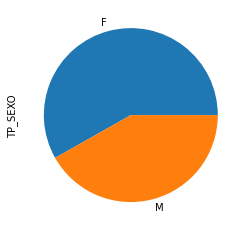

In [ ]:
ENEM["TP_SEXO"].value_counts().plot.pie(figsize=(6,4))

In [ ]:
Dupla = ['NU_ANO', 'TP_SEXO']
data = ENEM[Dupla].groupby(['NU_ANO'])['TP_SEXO'].value_counts(normalize=True)
df = pd.DataFrame(data)
df

TP_SEXO
NU_ANO TP_SEXO          
2015   F        0.575803
       M        0.424197
2016   F        0.580355
       M        0.419645
2017   F        0.586325
       M        0.413675
2018   F        0.590833
       M        0.409167
2019   F        0.578008
       M        0.421992

### ESCOLHA DA LINGUA

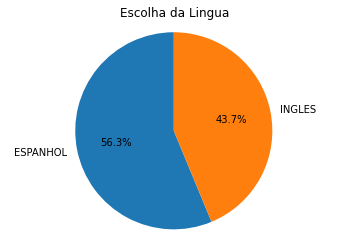

In [ ]:
ensino2 = ENEM["TP_LINGUA"].value_counts(normalize=True).values

fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.pie(ensino2, labels=['ESPANHOL', 'INGLES'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
plt.title("Escolha da Lingua")
plt.show()

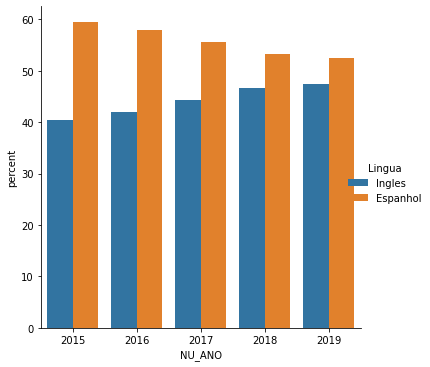

In [ ]:
x,y = 'NU_ANO', 'TP_LINGUA'
mylabels = 'Ingles', 'Espanhol'
g =(ENEM
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',legend_out = True))

# title
new_title = 'Lingua'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Ingles', 'Espanhol']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


## RAÇA

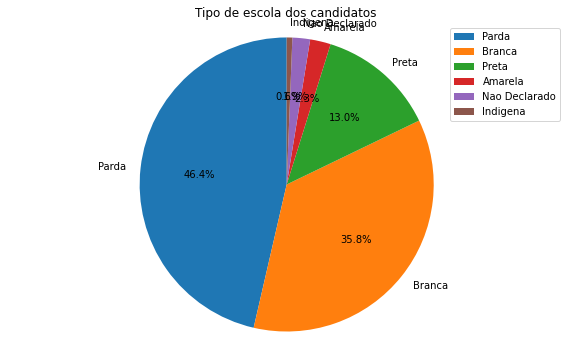

In [ ]:
ensino2 = ENEM["TP_COR_RACA"].value_counts(normalize=True).values
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(ensino2, labels=['Parda', 'Branca','Preta', 'Amarela','Nao Declarado', 'Indigena'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
plt.title("Tipo de escola dos candidatos")
plt.legend() 
plt.show()

In [ ]:
Dupla = ['NU_ANO', 'TP_COR_RACA']
data = ENEM[Dupla].groupby(['NU_ANO'])['TP_COR_RACA'].value_counts(normalize=True)
df = pd.DataFrame(data)
df

TP_COR_RACA
NU_ANO TP_COR_RACA             
2015   3               0.455548
       1               0.367111
       2               0.130889
       4               0.021976
       0               0.018692
       5               0.005784
2016   3               0.463818
       1               0.354522
       2               0.132975
       4               0.023319
       0               0.019097
       5               0.006268
2017   3               0.468632
       1               0.349893
       2               0.132948
       4               0.023078
       0               0.018942
       5               0.006507
2018   3               0.464533
       1               0.359403
       2               0.126719
       4               0.022419
       0               0.020754
       5               0.006172
2019   3               0.469951
       1               0.356529
       2               0.124655
       4               0.022570
       0               0.020038
       5               0.006258

## QUANTIDADE DE ALUNOS POR IDADE

(12.0, 48.0, 1000.0, 7352449.333333333)

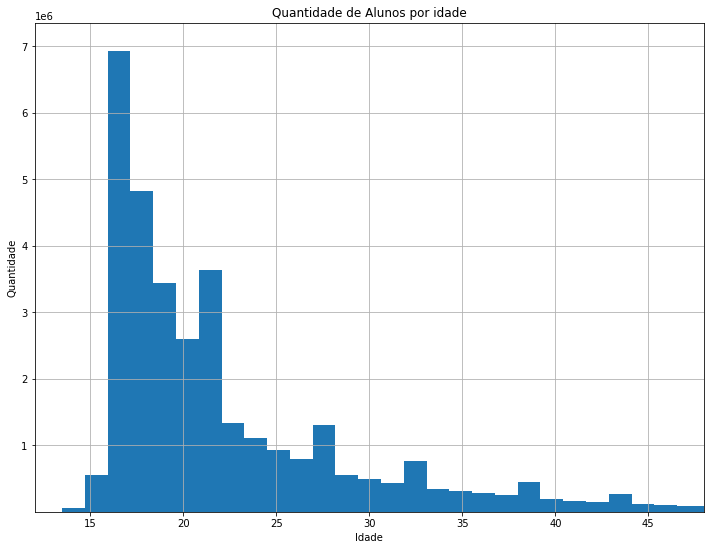

In [ ]:
ENEM["NU_IDADE"].hist(bins = 80, figsize = (12,9))
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Quantidade de Alunos por idade")
plt.axis([12, ENEM["NU_IDADE"].max() - 50, 1000, ENEM["NU_IDADE"].count()/4.5])

In [ ]:
ENEM.NU_IDADE.value_counts()

17    4885586
18    4818653
19    3439454
20    2595046
16    2036349
       ...   
98          2
91          2
90          2
1           1
95          1
Name: NU_IDADE, Length: 94, dtype: int64

TESTES

Text(0.5, 1.0, 'Quantidade de Alunos por idade')

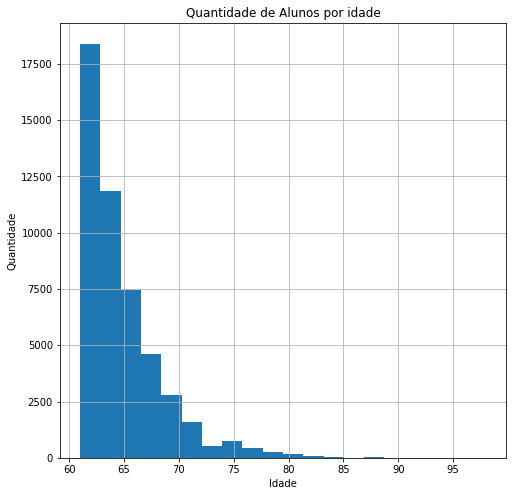

In [ ]:
IDADE = ENEM.query("NU_IDADE > 60")
IDADE["NU_IDADE"].hist(bins = 20, figsize = (8,8))
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Quantidade de Alunos por idade")

## NOTAS OBJETIVAS 

MEDIAS NACIONAIS

Os Graficos a seguir, representam a media das 4 materias objetivas, junto com a media(linha vermelha) e a moda (linha verde)

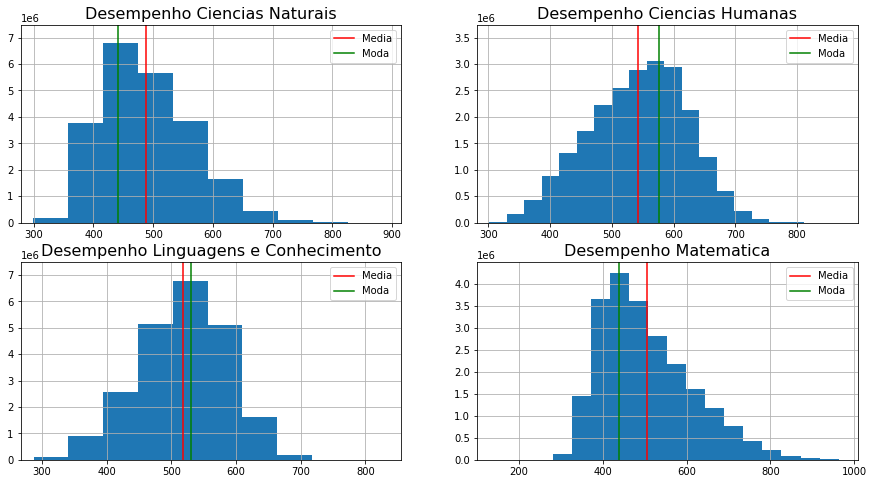

In [ ]:
plt.subplot(2, 2, 2)
E2["NU_NOTA_CH"].hist(bins = 20, figsize=(12, 10))
media = E2["NU_NOTA_CH"].mean()
moda = E2["NU_NOTA_CH"].mode()[0]
plt.axvline(media, c='r', label="Media") 
plt.axvline(moda, c='g', label="Moda") 
plt.title('Desempenho Ciencias Humanas', fontsize = 16)
plt.axis([E2.NU_NOTA_CH.min() - 20, E2.NU_NOTA_CH.max()+ 30, 0, E2.NU_NOTA_CH.count()/6])
plt.legend() 

plt.subplot(2, 2, 1)
E2["NU_NOTA_CN"].hist(bins = 10, figsize=(12, 8))
media = E2["NU_NOTA_CN"].mean()
moda = E2["NU_NOTA_CN"].mode()[0]
plt.axvline(media, c='r', label="Media") 
plt.axvline(moda, c='g', label="Moda") 
plt.title('Desempenho Ciencias Naturais', fontsize = 16)
plt.axis([E2.NU_NOTA_CN.min() - 20, E2.NU_NOTA_CN.max()+ 30, 0, E2.NU_NOTA_CN.count()/3])
plt.legend() 

plt.subplot(2, 2, 3)
E2["NU_NOTA_LC"].hist(bins = 10, figsize=(12, 8))
media = E2["NU_NOTA_LC"].mean()
moda = E2["NU_NOTA_LC"].mode()[0]
plt.axvline(media, c='r', label="Media") 
plt.axvline(moda, c='g', label="Moda") 
plt.title('Desempenho Linguagens e Conhecimento', fontsize = 16)
plt.axis([E2.NU_NOTA_LC.min() - 20, E2.NU_NOTA_LC.max()+ 30, 0, E2.NU_NOTA_CH.count()/3])
plt.legend() 

plt.subplot(2, 2, 4)
E2["NU_NOTA_MT"].hist(bins = 20, figsize=(15, 8))
media = E2["NU_NOTA_MT"].mean()
moda = E2["NU_NOTA_MT"].mode()[0]
plt.axvline(media, c='r', label="Media") 
plt.axvline(moda, c='g', label="Moda") 
plt.title('Desempenho Matematica', fontsize = 16)
plt.axis([E2.NU_NOTA_MT.min(), E2.NU_NOTA_MT.max(), 0, E2.NU_NOTA_MT.count()/5])
plt.legend() 

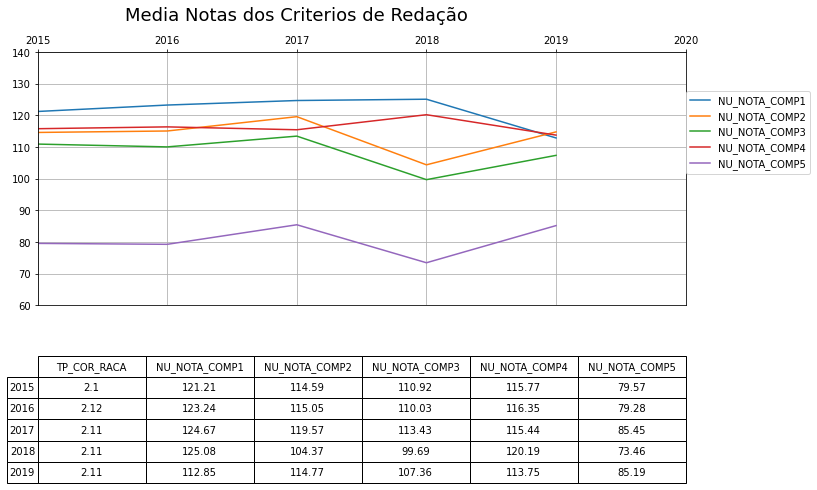

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4) )


ax.xaxis.tick_top()
plt.axis([2015, 2020, 60, 140])

plt.subplots_adjust(left=0, bottom=0, hspace=0.1)
asd = E1.groupby("NU_ANO").mean().round(2)
plt.table(cellText=asd.values,colWidths = [0.5]*len(asd.columns),
        rowLabels=asd.index,
        colLabels=asd.columns,
        cellLoc = 'center', rowLoc = 'center',
        loc='bottom', bbox=[0, -0.7, 1, 0.5]
        )

plt.plot(asd['NU_NOTA_COMP1'], label ="NU_NOTA_COMP1")
plt.plot(asd['NU_NOTA_COMP2'], label ="NU_NOTA_COMP2")
plt.plot(asd['NU_NOTA_COMP3'], label ="NU_NOTA_COMP3")
plt.plot(asd['NU_NOTA_COMP4'], label ="NU_NOTA_COMP4")
plt.plot(asd['NU_NOTA_COMP5'], label ="NU_NOTA_COMP5")
plt.legend( bbox_to_anchor=[1.2, 0.5], loc='lower right')
plt.grid(True)



Title = plt.title('Media Notas dos Criterios de Redação' , fontsize=18 )
Title.set_position([.4, 1.10])

plt.show()

In [ ]:
E2.describe().round(2)

,NU_ANO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC,TP_ESCOLA,NU_NOTA_SOMA
count,22443503.00,22443503.00,22443503.00,22443503.00,22443503.00,22443503.00,22443503.00,22443503.0,22443503.0,22443503.0,22443503.0,22443503.00,22443503.00
mean,2016.76,2.11,488.12,541.98,504.58,518.32,551.68,1.0,1.0,1.0,1.0,1.35,2053.00
std,1.40,1.02,74.18,78.55,108.42,68.01,143.51,0.0,0.0,0.0,0.0,0.62,271.94
min,2015.00,0.00,298.00,302.00,100.00,287.00,25.00,1.0,1.0,1.0,1.0,1.00,1284.00
25%,2016.00,1.00,431.00,486.00,421.00,473.00,460.00,1.0,1.0,1.0,1.0,1.00,1850.00
50%,2017.00,2.00,479.00,548.00,484.00,522.00,540.00,1.0,1.0,1.0,1.0,1.00,2014.00
75%,2018.00,3.00,538.00,600.00,571.00,567.00,640.00,1.0,1.0,1.0,1.0,2.00,2221.00
max,2019.00,5.00,885.00,868.00,1008.00,825.00,1000.00,1.0,1.0,1.0,1.0,4.00,3438.00


### MEDIAS POR REGIÃO

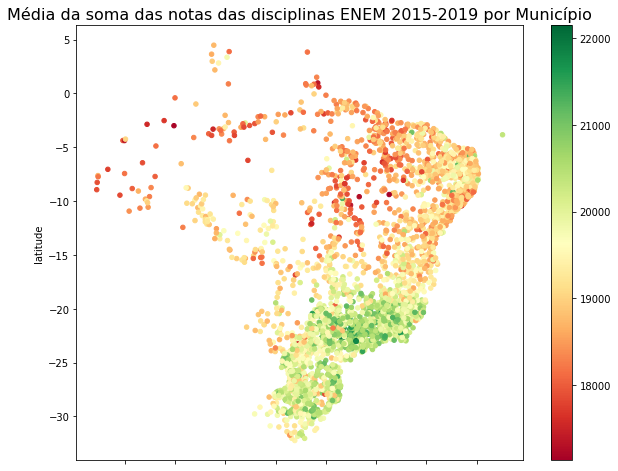

In [ ]:

concatenado_matematica = pd.merge(nota_media_geral_municipio, coordenadas, how = 'left', left_on=['Municipio'], right_on = ['nome'])

concatenado_matematica.plot.scatter(y='latitude', x = 'longitude', 
                         c = concatenado_matematica['NU_NOTA_SOMA'],
                         cmap = 'RdYlGn',
                         figsize = (10, 8)).set_title('Média da soma das notas das disciplinas ENEM 2015-2019 por Município',  fontsize = 16);

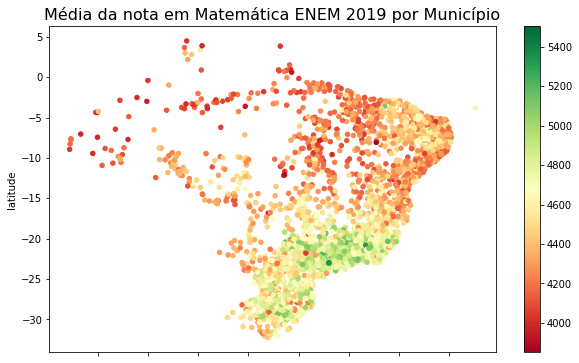

In [ ]:
concatenado_matematica = pd.merge(nota_media_geral_municipio, coordenadas, how = 'left', left_on=['Municipio'], right_on = ['nome'])

concatenado_matematica.plot.scatter(y='latitude', x = 'longitude', 
                         c = concatenado_matematica['NU_NOTA_MT'],
                         cmap = 'RdYlGn',
                         figsize = (10, 6)).set_title('Média da nota em Matemática ENEM 2019 por Município',  fontsize = 16);

In [ ]:
ENEM.MUNICIPIO.value_counts()

SAO PAULO          1548336
RIO DE JANEIRO      888706
FORTALEZA           627479
SALVADOR            611825
BRASILIA            608543
                    ...   
FORQUETINHA             80
SERIO                   78
POUSO NOVO              75
COQUEIRO BAIXO          70
CANUDOS DO VALE         57
Name: MUNICIPIO, Length: 5303, dtype: int64

## PRESENÇA/AUSENCIA

In [ ]:
Faltas = ENEM.TP_PRESENCA_LC.value_counts(normalize = True).values
SegundoFaltas = ENEM.TP_PRESENCA_MT.value_counts(normalize = True).values

fig = plt.figure()

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(Faltas, labels=['Presente', 'Ausente', 'Desclassificado'], autopct='%1.1f%%', radius = 1.2 , startangle=90, colors=['lightblue', 'lightgreen', 'red'])
ax2 = fig.add_axes([0.8, .0, .5, .5], aspect=1)
ax2.pie(SegundoFaltas, labels=['Presente', 'Ausente', 'Desclassificado'], autopct='%1.2f%%', radius = 1.2 , 
        startangle=90, colors=['lightblue', 'lightgreen', 'red'])

plt.show()

In [ ]:
ENEM.TP_PRESENCA_MT.count() * 0.042

Durante o tempo pesquisado x dos alunos faltaram para o exame do ENEM, houve uma micro parcela de alunos desclassificados e um 4% de alunos que foram somente no primeiro dia/semana do Exame

Essa metrica se mantem se dividirmos pelos anos ?

In [ ]:
data = ENEM.groupby(['NU_ANO'])['TP_PRESENCA_LC'].value_counts(normalize=True)
df = pd.DataFrame(data)
df

Existe clara influencia no tipo de escola que o aluno teve, mostrando em todas as areas que o **3° quartil do aluno de escola publica equivale ao 1° quartil do aluno de escola particular**, em resumo, um aluno de escola particular que está no limite das 25% piores notas, estará um pouco abaixo de um aluno entre os 25% melhores notas de um aluno de escola publica

In [ ]:
def escola_boxplot(data,y,title,ylabel):
  plt.figure(figsize=(8,6))
  ax = sns.boxplot(data=data, x='TP_ESCOLA', 
                  y=y,palette='autumn_r')
  ax.set_title(title, fontsize=20)
  ax.set_ylabel(ylabel)
  ax.set_xlabel('Classe Social');
  ax.set_xticklabels( ('Publica', 'Particular') )

provas_sigla = {'MT': 'Matemática', 
          'LC': 'Linguagens e Códigos', 
          'CN': 'Ciências da Natureza', 
          'CH': 'Ciências Humanas',
          'REDACAO': 'Redação', 'SOMA': 'soma'} 

for sigla, nome in zip(provas_sigla.keys(), provas_sigla.values()):
  escola_boxplot(ESCOLA, f'NU_NOTA_{sigla}', f'Distribuição da Nota de {nome}', f'Nota de {nome}')

## NOTAS DE REDAÇÃO

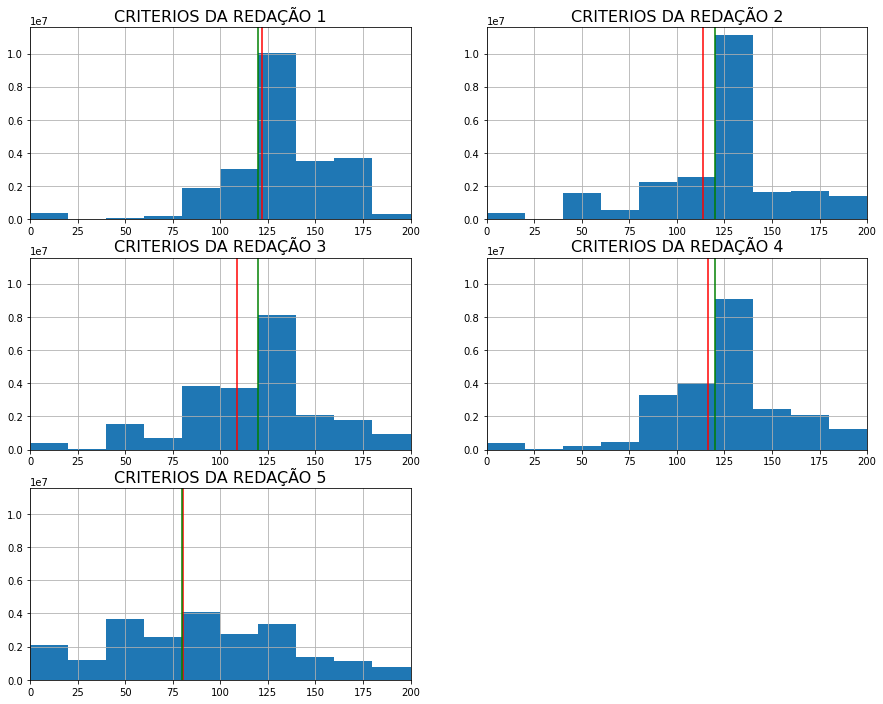

In [ ]:
Red = pd.DataFrame(E1)
plt.subplot(3, 2, 2)
plt.title('CRITERIOS DA REDAÇÃO 2', fontsize = 16)
reda(Red,"NU_NOTA_COMP2")

plt.subplot(3, 2, 1)
plt.title('CRITERIOS DA REDAÇÃO 1', fontsize = 16)
reda(Red,"NU_NOTA_COMP1")

plt.subplot(3, 2, 3)
plt.title('CRITERIOS DA REDAÇÃO 3', fontsize = 16)
reda(Red,"NU_NOTA_COMP3")

plt.subplot(3, 2, 4)
plt.title('CRITERIOS DA REDAÇÃO 4', fontsize = 16)
reda(Red,"NU_NOTA_COMP4")

plt.subplot(3, 2, 5)
plt.title('CRITERIOS DA REDAÇÃO 5', fontsize = 16)
reda(Red,"NU_NOTA_COMP5")


In [ ]:
correlacao =  E1[criterios2].corr()
correlacao

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
NU_NOTA_COMP1,1.000000,0.629997,0.687685,0.787408,0.512809
NU_NOTA_COMP2,0.629997,1.000000,0.865782,0.685759,0.636225
NU_NOTA_COMP3,0.687685,0.865782,1.000000,0.745229,0.658757
NU_NOTA_COMP4,0.787408,0.685759,0.745229,1.000000,0.599201
NU_NOTA_COMP5,0.512809,0.636225,0.658757,0.599201,1.000000


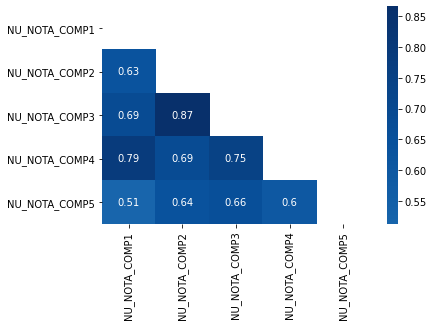

In [ ]:
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True, mask=mask)

#### CORRELAÇÃO

Existe alguma Correlação entre o desempenho do aluno de acordo com as notas ?



In [ ]:
corredacao =  E1[['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']].corr()

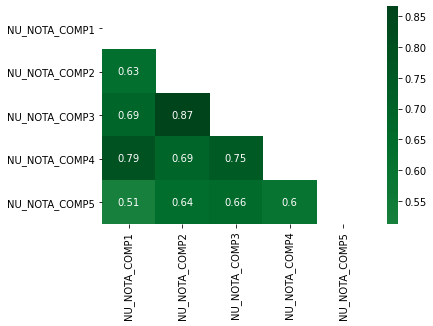

In [ ]:
mask = np.zeros_like(corredacao)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corredacao, cmap="Greens", center=0, annot=True, mask=mask)

##### Deletar

In [ ]:
del corredacao

### MEDIA DOS CRITERIOS DE REDAÇÃO

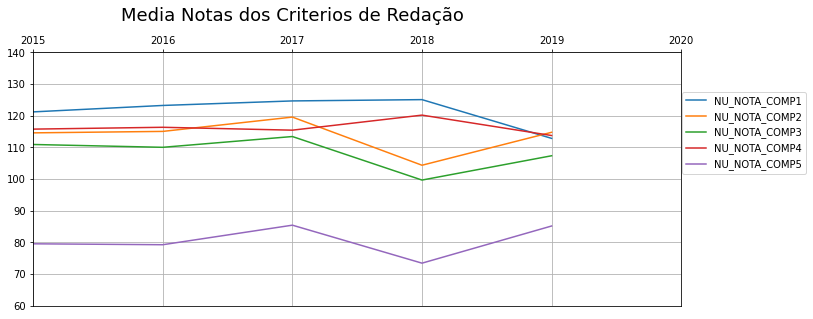

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4) )


ax.xaxis.tick_top()
plt.axis([2015, 2020, 60, 140])

plt.subplots_adjust(left=0, bottom=0, hspace=0.1)
asd = E1.groupby("NU_ANO").mean().round(2)

plt.plot(asd['NU_NOTA_COMP1'], label ="NU_NOTA_COMP1")
plt.plot(asd['NU_NOTA_COMP2'], label ="NU_NOTA_COMP2")
plt.plot(asd['NU_NOTA_COMP3'], label ="NU_NOTA_COMP3")
plt.plot(asd['NU_NOTA_COMP4'], label ="NU_NOTA_COMP4")
plt.plot(asd['NU_NOTA_COMP5'], label ="NU_NOTA_COMP5")
plt.legend( bbox_to_anchor=[1.2, 0.5], loc='lower right')
plt.grid(True)



Title = plt.title('Media Notas dos Criterios de Redação' , fontsize=18 )
Title.set_position([.4, 1.10])

plt.show()

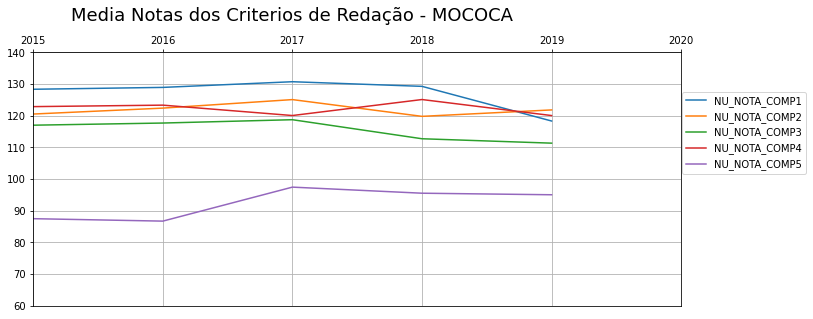

In [ ]:
Mococa1 = E1.query("MUNICIPIO == 'MOCOCA'")
fig, ax = plt.subplots(1, 1, figsize=(10, 4) )


ax.xaxis.tick_top()
plt.axis([2015, 2020, 60, 140])

plt.subplots_adjust(left=0, bottom=0, hspace=0.1)
asd = Mococa1.groupby("NU_ANO").mean().round(2)

plt.plot(asd['NU_NOTA_COMP1'], label ="NU_NOTA_COMP1")
plt.plot(asd['NU_NOTA_COMP2'], label ="NU_NOTA_COMP2")
plt.plot(asd['NU_NOTA_COMP3'], label ="NU_NOTA_COMP3")
plt.plot(asd['NU_NOTA_COMP4'], label ="NU_NOTA_COMP4")
plt.plot(asd['NU_NOTA_COMP5'], label ="NU_NOTA_COMP5")
plt.legend( bbox_to_anchor=[1.2, 0.5], loc='lower right')
plt.grid(True)



Title = plt.title('Media Notas dos Criterios de Redação - MOCOCA' , fontsize=18 )
Title.set_position([.4, 1.10])

plt.show()

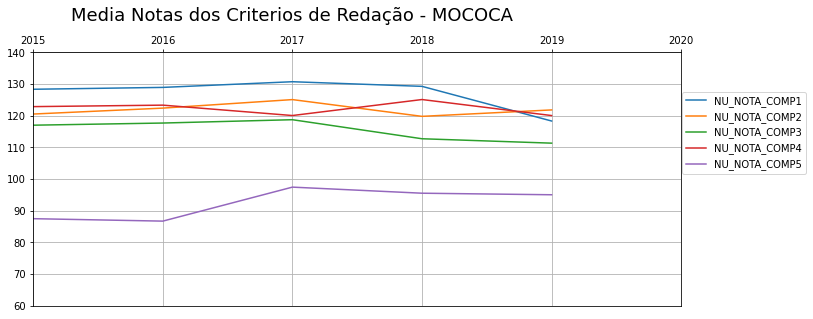

In [ ]:
Ribeirao1 = E1.query("MUNICIPIO =='RIBEIRAO PRETO' | MUNICIPIO =='MOCOCA'| MUNICIPIO =='SAO JOSE DO RIO PARDO' | MUNICIPIO =='CASA BRANCA' ")
fig, ax = plt.subplots(1, 1, figsize=(10, 4) )


ax.xaxis.tick_top()
plt.axis([2015, 2020, 60, 140])

plt.subplots_adjust(left=0, bottom=0, hspace=0.1)
asd = Mococa1.groupby("NU_ANO").mean().round(2)

plt.plot(asd['NU_NOTA_COMP1'], label ="NU_NOTA_COMP1")
plt.plot(asd['NU_NOTA_COMP2'], label ="NU_NOTA_COMP2")
plt.plot(asd['NU_NOTA_COMP3'], label ="NU_NOTA_COMP3")
plt.plot(asd['NU_NOTA_COMP4'], label ="NU_NOTA_COMP4")
plt.plot(asd['NU_NOTA_COMP5'], label ="NU_NOTA_COMP5")
plt.legend( bbox_to_anchor=[1.2, 0.5], loc='lower right')
plt.grid(True)



Title = plt.title('Media Notas dos Criterios de Redação - REGIÃO RIBEIRAO PRETO' , fontsize=18 )
Title.set_position([.4, 1.10])

plt.show()

# GRAFICO MOCOCA E REGIAO RIBEIRAO PRETO

VARIAVEL PARA A PESQUISA DA CIDADE

NUMERO DE PESSOAS INSCRITAS PARA O ENEM

In [ ]:
MOCOCA = cidadeGeral(ENEM,"MUNICIPIO =='MOCOCA'")
MOCOCA.head()

6752


,MUNICIPIO,LOCALPROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC,CARRO
312,MOCOCA,MOCOCA,501,592,490,533,120,120,100,100,120,560,1,1,1,1,1
985,MOCOCA,MOCOCA,366,568,393,507,120,120,120,120,80,560,1,1,1,1,1
9476,MOCOCA,MOCOCA,463,648,503,635,120,100,120,120,40,500,1,1,1,1,1
18029,MOCOCA,MOCOCA,513,609,607,618,160,160,140,160,100,720,1,1,1,1,1
23752,MOCOCA,MOCOCA,363,472,456,531,120,120,120,100,80,540,1,1,1,1,1


In [ ]:
RIBEIRAO = cidadeGeral(ENEM,"MUNICIPIO =='RIBEIRAO PRETO' | MUNICIPIO =='MOCOCA'| MUNICIPIO =='SAO JOSE DO RIO PARDO' | MUNICIPIO =='CASA BRANCA' ")
RIBEIRAO.MUNICIPIO.value_counts()

99231


RIBEIRAO PRETO           84374
MOCOCA                    6752
SAO JOSE DO RIO PARDO     5661
CASA BRANCA               2444
Name: MUNICIPIO, dtype: int64

## NOTAS OBJETIVAS

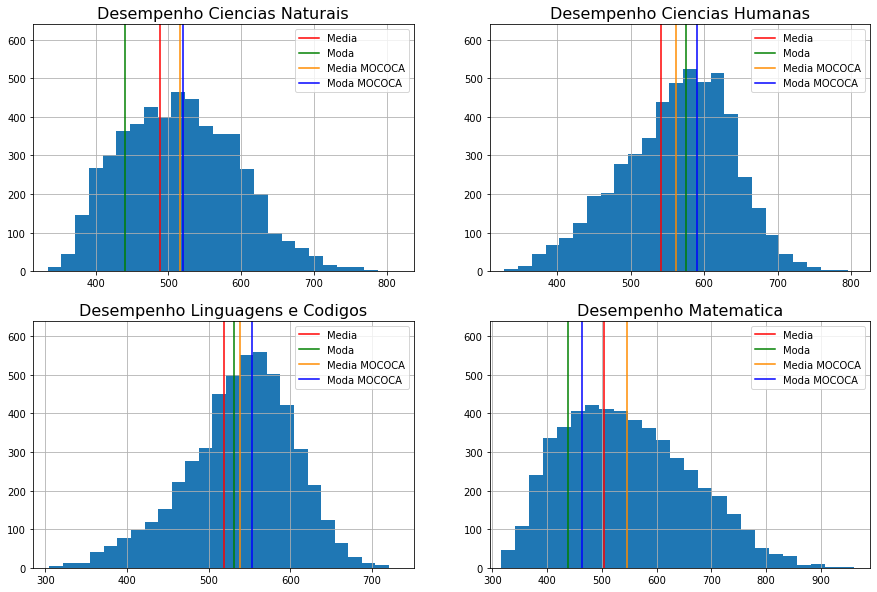

In [ ]:
plt.subplot(2, 2, 2)
plot(MOCOCA,E2,'NU_NOTA_CH')
plt.title('Desempenho Ciencias Humanas', fontsize = 16)
plt.axis([MOCOCA.NU_NOTA_CH.min() - 20, MOCOCA.NU_NOTA_CH.max()+ 30, 0, MOCOCA.NU_NOTA_CH.count()/8])
plt.legend() 

plt.subplot(2, 2, 1)
plot(MOCOCA,E2,'NU_NOTA_CN')
plt.title('Desempenho Ciencias Naturais', fontsize = 16)
plt.axis([MOCOCA.NU_NOTA_CN.min() - 20, MOCOCA.NU_NOTA_CN.max()+ 30, 0, MOCOCA.NU_NOTA_CN.count()/8])
plt.legend() 

plt.subplot(2, 2, 3)
plot(MOCOCA,E2,'NU_NOTA_LC')
plt.title('Desempenho Linguagens e Codigos', fontsize = 16)
plt.axis([MOCOCA.NU_NOTA_LC.min() - 20, MOCOCA.NU_NOTA_LC.max()+ 30, 0, MOCOCA.NU_NOTA_LC.count()/8])
plt.legend() 

plt.subplot(2, 2, 4)
plot(MOCOCA,E2,'NU_NOTA_MT')
plt.title('Desempenho Matematica', fontsize = 16)
plt.axis([MOCOCA.NU_NOTA_MT.min() - 20, MOCOCA.NU_NOTA_MT.max()+ 30, 0, MOCOCA.NU_NOTA_MT.count()/8])
plt.legend() 

LEGENDA:

VERMELHO = MEDIA NACIONAL 

VERDE = MODA NACIONAL

LARANJA = MEDIA MOCOCA

AZUL = MODA MOCOCA 








É possivel analisar que a Cidade de Mococa possui medias e modas melhores comparados ao ambito nacional, porem possui caracteristicas semelhantes com o grafico nacional, como maior dificuldade em ciencias naturais, maior nota em matematica com maior numero de candidatos abaixo da media.Pontos para serem destacados são a moda alta em Ciencias Humanas e quantidade de alunos acima da media em Linguagens e Codigos

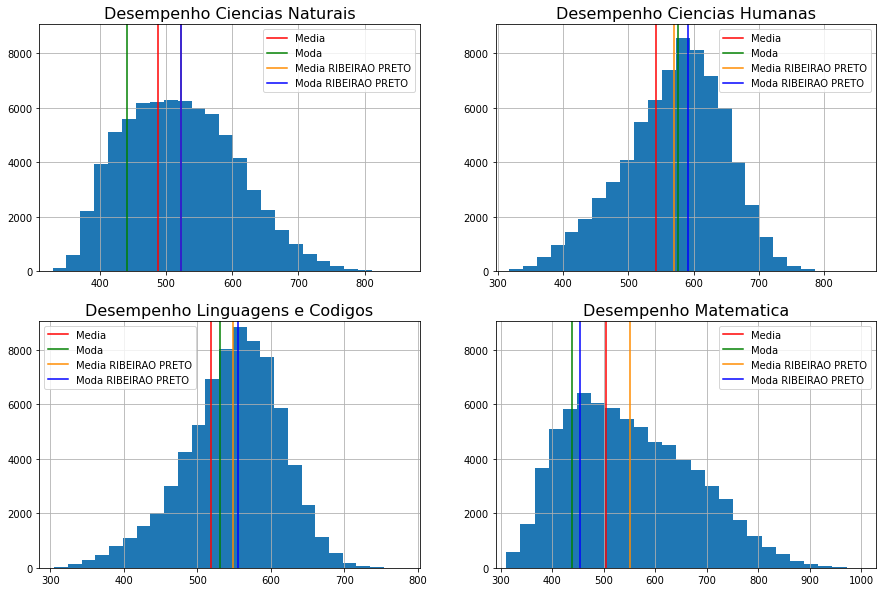

In [ ]:
plt.subplot(2, 2, 2)
plot(RIBEIRAO,E2,'NU_NOTA_CH')
plt.title('Desempenho Ciencias Humanas', fontsize = 16)
plt.axis([RIBEIRAO.NU_NOTA_CH.min() - 20, RIBEIRAO.NU_NOTA_CH.max()+ 30, 0, RIBEIRAO.NU_NOTA_CH.count()/8])
plt.legend() 

plt.subplot(2, 2, 1)
plot(RIBEIRAO,E2,'NU_NOTA_CN')
plt.title('Desempenho Ciencias Naturais', fontsize = 16)
plt.axis([RIBEIRAO.NU_NOTA_CN.min() - 20, RIBEIRAO.NU_NOTA_CN.max()+ 30, 0, RIBEIRAO.NU_NOTA_CN.count()/8])
plt.legend() 

plt.subplot(2, 2, 3)
plot(RIBEIRAO,E2,'NU_NOTA_LC')
plt.title('Desempenho Linguagens e Codigos', fontsize = 16)
plt.axis([RIBEIRAO.NU_NOTA_LC.min() - 20, RIBEIRAO.NU_NOTA_LC.max()+ 30, 0, RIBEIRAO.NU_NOTA_LC.count()/8])
plt.legend() 

plt.subplot(2, 2, 4)
plot(RIBEIRAO,E2,'NU_NOTA_MT')
plt.title('Desempenho Matematica', fontsize = 16)
plt.axis([RIBEIRAO.NU_NOTA_MT.min() - 20, RIBEIRAO.NU_NOTA_MT.max()+ 30, 0, RIBEIRAO.NU_NOTA_MT.count()/8])
plt.legend() 

In [ ]:
Loc = MOCOCA.query('MUNICIPIO != LOCALPROVA')[presenca]
for i in MOCOCA:
  i = MOCOCA.loc[(MOCOCA['LOCALPROVA'] == 'MOCOCA'),  'DESTINO'] = 'MOCOCA'
  i = MOCOCA.loc[(MOCOCA['LOCALPROVA'] != 'MOCOCA'),  'DESTINO'] = 'DIFERENTE'

In [ ]:
MOCOCA.DESTINO.value_counts()

MOCOCA       4676
DIFERENTE     442
Name: DESTINO, dtype: int64

In [ ]:
MOCOCA.TP_PRESENCA_CH.value_counts()

1    5330
0    1418
2       4
Name: TP_PRESENCA_CH, dtype: int64

In [ ]:
RIBEIRAO.TP_PRESENCA_MT.value_counts(normalize=True)

1    0.734871
0    0.264786
2    0.000343
Name: TP_PRESENCA_MT, dtype: float64

## MOCOCA PRESENÇA E SIM/NÃO CARROS

In [ ]:
MOCOCA.CARRO.value_counts()

1    5437
0    1315
Name: CARRO, dtype: int64

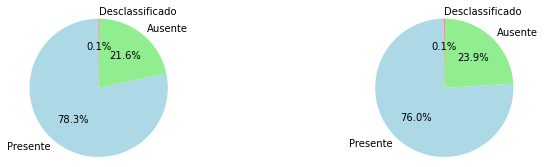

In [ ]:
Faltas = MOCOCA.TP_PRESENCA_LC.value_counts(normalize = True).values
SegundoFaltas = MOCOCA.TP_PRESENCA_MT.value_counts(normalize = True).values


fig = plt.figure()


ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(Faltas, labels=['Presente', 'Ausente', 'Desclassificado'], autopct='%1.1f%%', radius = 1.2 , startangle=90, colors=['lightblue', 'lightgreen', 'red'])
ax2 = fig.add_axes([0.8, .0, .5, .5], aspect=1)
ax2.pie(SegundoFaltas, labels=['Presente', 'Ausente', 'Desclassificado'], autopct='%1.1f%%', radius = 1.2 , 
        startangle=90, colors=['lightblue', 'lightgreen', 'red'])
plt.show()

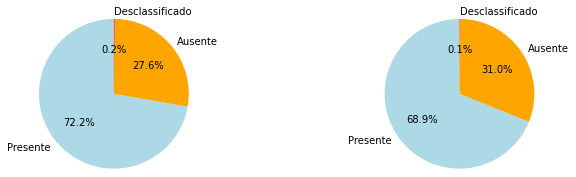

In [ ]:
carros_nao = MOCOCA.query('CARRO == 0') 
Faltas = carros_nao.TP_PRESENCA_LC.value_counts(normalize = True).values
SegundoFaltas = carros_nao.TP_PRESENCA_MT.value_counts(normalize = True).values


fig = plt.figure()


ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(Faltas, labels=['Presente', 'Ausente', 'Desclassificado'], autopct='%1.1f%%', radius = 1.3 , startangle=90, colors=['lightblue', 'orange', 'red'])
ax2 = fig.add_axes([0.8, .0, .5, .5], aspect=1)
ax2.pie(SegundoFaltas, labels=['Presente', 'Ausente', 'Desclassificado'], autopct='%1.1f%%', radius = 1.3 , 
        startangle=90, colors=['lightblue', 'orange', 'red'])
plt.show()

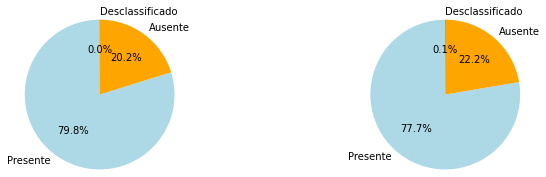

In [ ]:
carros_nao = MOCOCA.query('CARRO == 1') 
Faltas = carros_nao.TP_PRESENCA_LC.value_counts(normalize = True).values
SegundoFaltas = carros_nao.TP_PRESENCA_MT.value_counts(normalize = True).values


fig = plt.figure()


ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(Faltas, labels=['Presente', 'Ausente', 'Desclassificado'], autopct='%1.1f%%', radius = 1.3 , startangle=90, colors=['lightblue', 'orange', 'red'])
ax2 = fig.add_axes([0.8, .0, .5, .5], aspect=1)
ax2.pie(SegundoFaltas, labels=['Presente', 'Ausente', 'Desclassificado'], autopct='%1.1f%%', radius = 1.3 , 
        startangle=90, colors=['lightblue', 'orange', 'red'])
plt.show()

## RIBEIRAO PRETO PRESENÇA E SIM/NÃO CARROS

## MEMORIA

In [ ]:
  def MOC(data) :
    data['NU_NOTA_CN'] =  data['NU_NOTA_CN'].astype("int16")
    data['NU_NOTA_CH'] =  data['NU_NOTA_CH'].astype("int16")
    data['NU_NOTA_LC'] =  data['NU_NOTA_LC'].astype("int16")
    data['NU_NOTA_MT'] =  data['NU_NOTA_MT'].astype("int16")
    return (data)

In [ ]:
MOC(MOCOCA)

,MUNICIPIO,LOCALPROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC,CARRO
312,MOCOCA,MOCOCA,501,592,490,533,120,120,100,100,120,560,1,1,1,1,1
985,MOCOCA,MOCOCA,366,568,393,507,120,120,120,120,80,560,1,1,1,1,1
9476,MOCOCA,MOCOCA,463,648,503,635,120,100,120,120,40,500,1,1,1,1,1
18029,MOCOCA,MOCOCA,513,609,607,618,160,160,140,160,100,720,1,1,1,1,1
23752,MOCOCA,MOCOCA,363,472,456,531,120,120,120,100,80,540,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5010467,MOCOCA,MOCOCA,557,537,628,503,120,120,120,120,40,520,1,1,1,1,1
5071353,MOCOCA,MOCOCA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5081612,MOCOCA,MOCOCA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5093304,MOCOCA,MOCOCA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados_municipios_gerais_medias = semzero(dados_municipios_gerais_medias)
df = dados_municipios_gerais_medias.groupby("MUNICIPIO").mean().round(2)
df.sort_values("NU_NOTA_SOMA", ascending=True)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_SOMA
MUNICIPIO,,,,,
GUARIBAS,4326.68,4626.16,4098.21,4080.79,17131.84
AMATURA,4193.83,4802.66,3943.94,4204.89,17145.33
UARINI,4037.24,4935.55,3971.28,4235.66,17179.73
LIZARDA,4145.51,4823.10,4003.37,4304.56,17276.54
CUTIAS,4247.35,4756.54,4021.88,4313.12,17338.88
...,...,...,...,...,...
FLORIANOPOLIS,5198.76,5970.15,5242.32,5478.98,21890.21
NITEROI,5189.14,5992.35,5288.46,5459.95,21929.90
SAO JOAO DA MATA,5136.75,5878.67,5638.04,5381.81,22035.27


In [ ]:
dados_municipios_gerais_medias.MUNICIPIO.value_counts()

SAO PAULO           1022833
RIO DE JANEIRO       616373
FORTALEZA            433974
BRASILIA             413695
SALVADOR             403120
                     ...   
POUSO NOVO               56
CHAPADA DE AREIA         55
COQUEIRO BAIXO           47
CANUDOS DO VALE          44
UIRAMUTA                 44
Name: MUNICIPIO, Length: 5303, dtype: int64

In [ ]:
E1.groupby("NU_ANO").mean().round(2)

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
NU_ANO,,,,,
2015,121.21,114.59,110.92,115.77,79.57
2016,123.24,115.05,110.03,116.35,79.28
2017,124.67,119.57,113.43,115.44,85.45
2018,125.08,104.37,99.69,120.19,73.46
2019,112.85,114.77,107.36,113.75,85.19


In [ ]:
display(len(ENEM))
display(len(ENEM16))
display(len(ENEM17))
display(len(ENEM18))
display(len(ENEM19))




33086022

8000000

6731340

5513747

5095270

In [ ]:
ENEM.query('NU_NOTA_CN	>= 300')

In [ ]:
ENEM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33086022 entries, 0 to 5095269
Data columns (total 31 columns):
 #   Column             Dtype   
---  ------             -----   
 0   NU_ANO             int16   
 1   MUNICIPIO          object  
 2   SG_UF_RESIDENCIA   category
 3   NU_IDADE           int16   
 4   TP_SEXO            category
 5   NU_RENDA_FAMILIAR  category
 6   TP_COR_RACA        int64   
 7   TP_ESCOLA          int64   
 8   TP_PRESENCA_CN     int16   
 9   TP_PRESENCA_CH     int16   
 10  TP_PRESENCA_LC     int16   
 11  TP_PRESENCA_MT     int16   
 12  NU_NOTA_CN         int16   
 13  NU_NOTA_CH         int16   
 14  NU_NOTA_LC         int16   
 15  NU_NOTA_MT         int16   
 16  TP_LINGUA          int8    
 17  TP_STATUS_REDACAO  float64 
 18  NU_NOTA_REDACAO    int16   
 19  NU_NOTA_COMP1      int16   
 20  NU_NOTA_COMP2      int16   
 21  NU_NOTA_COMP3      int16   
 22  NU_NOTA_COMP4      int16   
 23  NU_NOTA_COMP5      int16   
 24  LOCALPROVA         obje

In [ ]:
ENEM.memory_usage(index=False, deep=True)

NU_ANO                 66172044
MUNICIPIO            2223091515
SG_UF_RESIDENCIA       33088895
NU_IDADE               66172044
TP_SEXO                33086234
NU_RENDA_FAMILIAR      33086472
TP_COR_RACA           264688176
TP_ESCOLA             264688176
TP_PRESENCA_CN         66172044
TP_PRESENCA_CH         66172044
TP_PRESENCA_LC         66172044
TP_PRESENCA_MT         66172044
NU_NOTA_CN             66172044
NU_NOTA_CH             66172044
NU_NOTA_LC             66172044
NU_NOTA_MT             66172044
TP_LINGUA              33086022
TP_STATUS_REDACAO     264688176
NU_NOTA_REDACAO        66172044
NU_NOTA_COMP1          66172044
NU_NOTA_COMP2          66172044
NU_NOTA_COMP3          66172044
NU_NOTA_COMP4          66172044
NU_NOTA_COMP5          66172044
LOCALPROVA           2215897689
Q003                   33086538
Q004                   33086538
Q006                   33087664
Q024                   33086472
Q025                   33086218
CARRO                  33086022
dtype: i

# ALGUMAS QUESTOES LEVANTADAS DURANTE A ANALISE

No decorrer da analise, optou-se pela criação de uma tabela que soma todas as notas de desempenho, pois observou-se que em todas as disciplinas ocorre o mesmo padrão de visualização, assim a tabela SOMA das notas, representará a analise das quatro disciplinas aplicadas pela ENEM

## A RENDA INFLUENCIA NAS NOTAS DOS ALUNOS ?

Um dos questionamentos mais comuns é o quanto a classe social ou renda do aluno pode influenciar em suas notas

Para está analise, utilizaremos a classificação das 
Classes Sociais por Faixas de Salário-Mínimo (IBGE)
Classe Número de Salários-Mínimo (SM) Renda Familiar (R$) em 2020

A Acima de 20 SM 20.900,01 ou mais

B De 10 a 20 SM 10.450,01 a R$ 20.900,00

C De 4 a 10 SM 4.180,01 a 10.450,00

D De 2 a 4 SM 2.090,01 a 4.180,00

E Até 2 SM Até 2.090,00

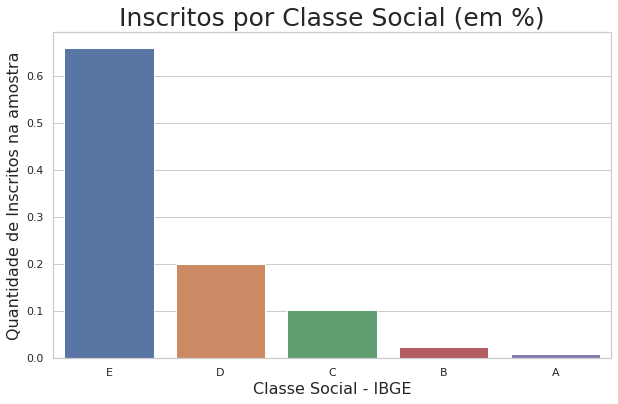

In [ ]:
social = pd.DataFrame(ENEM['NU_RENDA_FAMILIAR'].value_counts(normalize=True).sort_index(ascending=False))
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=ENEM, x=['E' , 'D', 'C','B','A'], y=social['NU_RENDA_FAMILIAR']  )
ax.set_title('Inscritos por Classe Social (em %)', fontsize=25)
ax.set_xlabel('Classe Social - IBGE', fontsize=16)
ax.set_ylabel('Quantidade de Inscritos na amostra', fontsize=16);

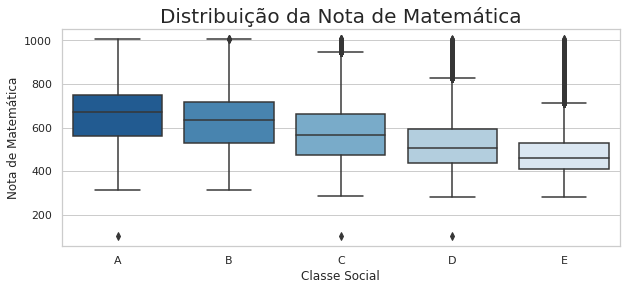

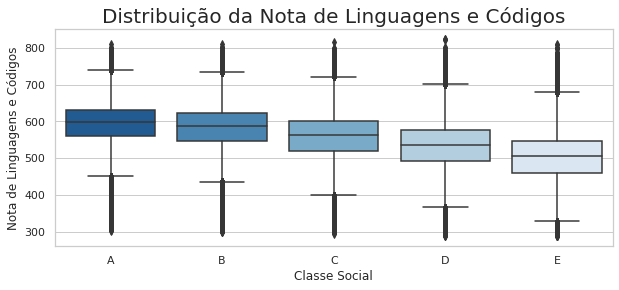

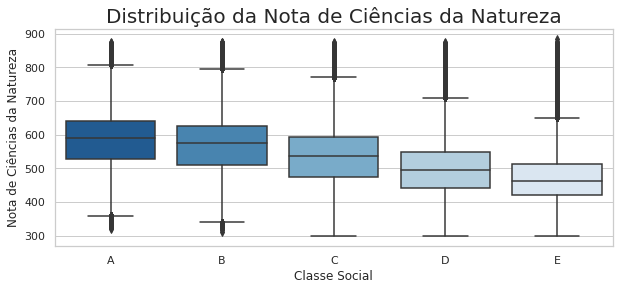

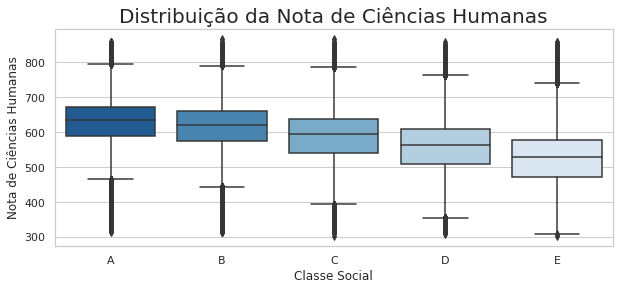

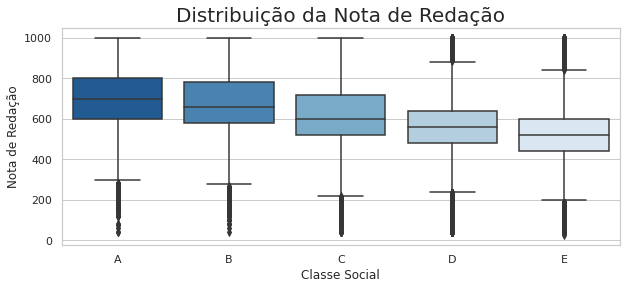

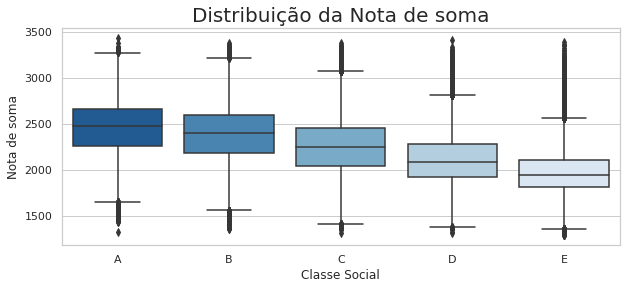

In [ ]:
def cria_boxplot(data,y,title,ylabel):
  plt.figure(figsize=(10,4))
  ax = sns.boxplot(data=data, x='NU_RENDA_FAMILIAR',   y=y, palette='Blues_r',order=['A', 'B', 'C', 'D', 'E'])
  ax.set_title(title, fontsize=20)
  ax.set_ylabel(ylabel)
  ax.set_xlabel('Classe Social');

provas_sigla = {'MT': 'Matemática', 
          'LC': 'Linguagens e Códigos', 
          'CN': 'Ciências da Natureza', 
          'CH': 'Ciências Humanas', 
          'REDACAO': 'Redação',
          'SOMA': 'soma'} 

for sigla, nome in zip(provas_sigla.keys(), provas_sigla.values()):
  cria_boxplot(E2, f'NU_NOTA_{sigla}', f'Distribuição da Nota de {nome}', f'Nota de {nome}')


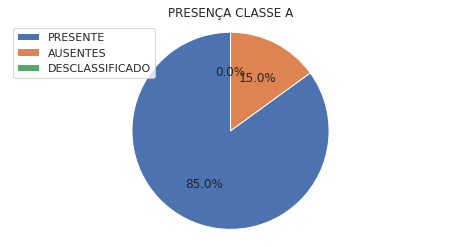

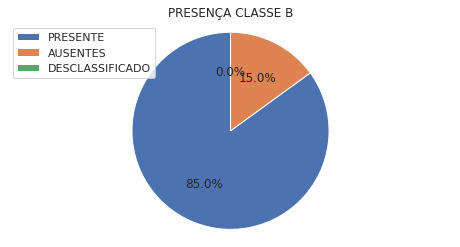

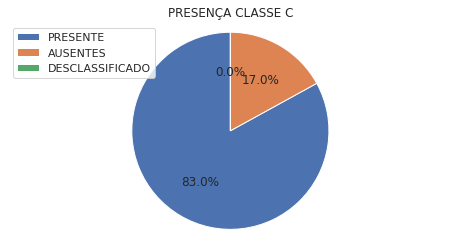

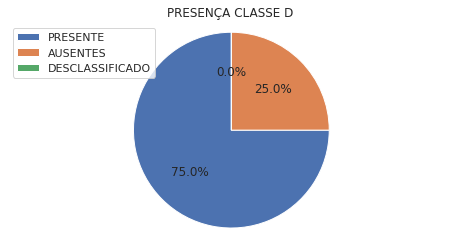

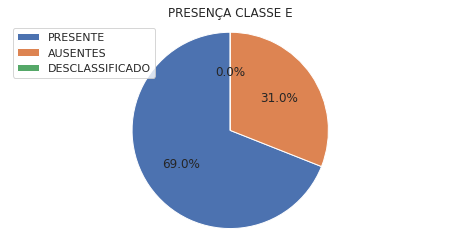

In [ ]:
Renda = ['A', 'B','C','D','E']
for i in range(5):
 Faltas = ENEM.query("NU_RENDA_FAMILIAR == @Renda[@i]")
 Faltas = Faltas[["TP_PRESENCA_LC"]].value_counts(normalize = True).round(2)
 fig1, ax1 = plt.subplots(figsize=(8, 4))
 labels=['PRESENTE', 'AUSENTES', "DESCLASSIFICADO"]
 ax1.pie(Faltas, autopct='%1.1f%%', startangle=90)
 ax1.axis('equal')
 plt.title("PRESENÇA CLASSE " +Renda[i])
 plt.legend(labels)
 plt.show()

Observando as Notas, podemos analisar que a renda tem influencia no resultado das notas do ENEM

## E O TIPO DE ESCOLA, INFLUENCIA NAS NOTAS DOS ALUNOS ? (PUBLICA/PARTICULAR)

## A DISTANCIA PARA O LOCAL DA PROVA PODE INFLUENCIAR NA AUSENCIA DO CANDIDATO ?

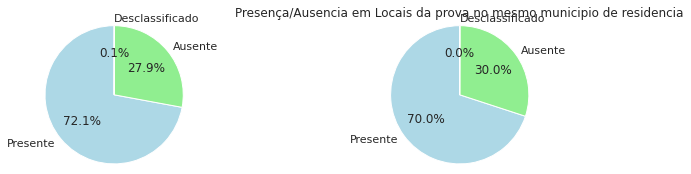

In [ ]:
Loc = ENEM.query('MUNICIPIO == LOCALPROVA') 
Faltas = Loc.TP_PRESENCA_LC.value_counts(normalize = True).values
SegundoFaltas = Loc.TP_PRESENCA_MT.value_counts(normalize = True).values


fig = plt.figure()


ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(Faltas, labels=['Presente', 'Ausente', 'Desclassificado'], autopct='%1.1f%%', radius = 1.2 , startangle=90, colors=['lightblue', 'lightgreen', 'red'])
ax2 = fig.add_axes([0.8, .0, .5, .5], aspect=1)
ax2.pie(SegundoFaltas, labels=['Presente', 'Ausente', 'Desclassificado'], autopct='%1.1f%%', radius = 1.2 , 
        startangle=90, colors=['lightblue', 'lightgreen', 'red'])
plt.title("Presença/Ausencia em Locais da prova no mesmo municipio de residencia")
plt.show()

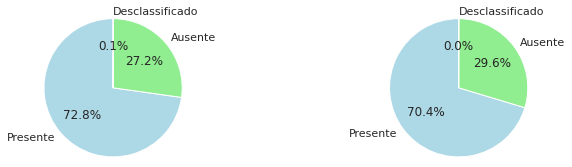

In [ ]:
Loc = ENEM.query('MUNICIPIO != LOCALPROVA') 
Faltas = Loc.TP_PRESENCA_LC.value_counts(normalize = True).values
SegundoFaltas = Loc.TP_PRESENCA_MT.value_counts(normalize = True).values


fig = plt.figure()


ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(Faltas, labels=['Presente', 'Ausente', 'Desclassificado'], autopct='%1.1f%%', radius = 1.2 , startangle=90, colors=['lightblue', 'lightgreen', 'red'])
ax2 = fig.add_axes([0.8, .0, .5, .5], aspect=1)
ax2.pie(SegundoFaltas, labels=['Presente', 'Ausente', 'Desclassificado'], autopct='%1.1f%%', radius = 1.2 , 
        startangle=90, colors=['lightblue', 'lightgreen', 'red'])
plt.show()

## A NECESSIDADE DE UM TRANSPORTE PUBLICO PODE INFLUENCIAR NA AUSENCIA DO CANDIDATO ?

Verificando quantos alunos tem veiculo proprio em casa

Text(0.5, 1.0, 'Proporção para candidatos que tem carro em sua residência')

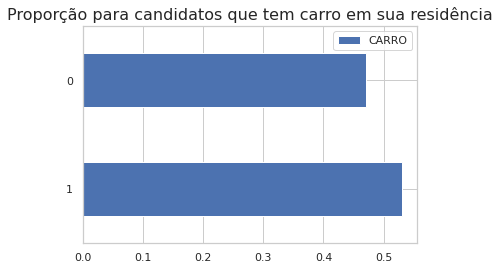

In [ ]:
carros_enem_terounao = pd.DataFrame(ENEM['CARRO'].value_counts(normalize = True))
labels=['Não Tem', 'Tem']
carros_enem_terounao.plot.barh().set_title('Proporção para candidatos que tem carro em sua residência', fontsize = 16)

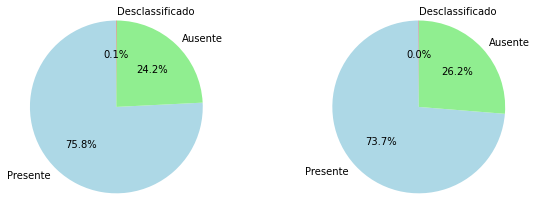

In [ ]:
carros_sim = ENEM.query('CARRO == 1') 
Faltas_sim = carros_sim.TP_PRESENCA_LC.value_counts(normalize = True).values
SegundoFaltas_sim = carros_sim.TP_PRESENCA_MT.value_counts(normalize = True).values

fig = plt.figure()

ax1 = fig.add_axes([0, 0, 1, .5], aspect=1)
ax1.pie(Faltas_sim, labels=['Presente', 'Ausente', 'Desclassificado'], autopct='%1.1f%%', radius = 1.5 , startangle=90, colors=['lightblue', 'lightgreen', 'red'])
ax2 = fig.add_axes([0.7, .0, 1, .5], aspect=1)
ax2.pie(SegundoFaltas_sim, labels=['Presente', 'Ausente', 'Desclassificado'], autopct='%1.1f%%', radius = 1.5 , 
        startangle=90, colors=['lightblue', 'lightgreen', 'red'])

plt.show()

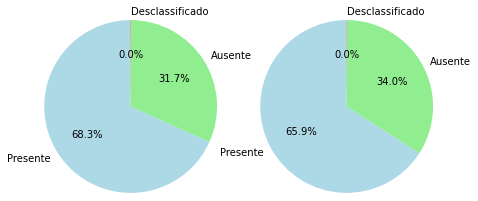

In [ ]:
carros_nao = ENEM.query('CARRO == 0') 
Faltas = carros_nao.TP_PRESENCA_LC.value_counts(normalize = True).values
SegundoFaltas = carros_nao.TP_PRESENCA_MT.value_counts(normalize = True).values

fig = plt.figure()

ax3 = fig.add_axes([0, 0, 3.5, .5], aspect=1)
ax3.pie(Faltas, labels=['Presente', 'Ausente', 'Desclassificado'], autopct='%1.1f%%', radius = 1.5 , startangle=90, colors=['lightblue', 'lightgreen', 'red'])
ax4 = fig.add_axes([0.5, .0, 3.5, .5], aspect=1)
ax4.pie(SegundoFaltas, labels=['Presente', 'Ausente', 'Desclassificado'], autopct='%1.1f%%', radius = 1.5 , 
        startangle=90, colors=['lightblue', 'lightgreen', 'red'])
plt.show()

 Deletar

In [ ]:
del carros_nao, carros_sim

## PODEMOS IDENTIFICAR DIFERENÇAS DE DESEMPENHO ENTRE REGIÕES ?

In [ ]:
Estados = ENEM[provas + ['SG_UF_RESIDENCIA']]
soma(Estados)
Estados = semzero(Estados)
Estados.groupby('SG_UF_RESIDENCIA')[['NU_NOTA_SOMA']].mean().sort_values(by= 'NU_NOTA_SOMA').round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NU_NOTA_SOMA
SG_UF_RESIDENCIA,
AC,1935.03
AP,1938.30
MA,1939.95
AM,1946.01
PA,1959.43
TO,1960.77
AL,1965.05
PI,1967.80
RO,1971.30


obtendo a media de somatorio de notas e agrupando por estado, podemos notar uma grande diferença entre regiões no geral, onde tres das quatro melhores media é da região Sudeste,das dez melhores, apenas uma é do Norte/Nordeste (Rio Grande do Norte) e quatro das cinco piores media é da região Norte do Brasil

## MEDIA DE NOTAS POR RAÇA

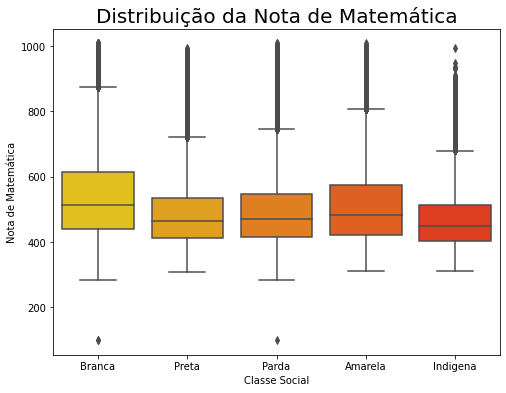

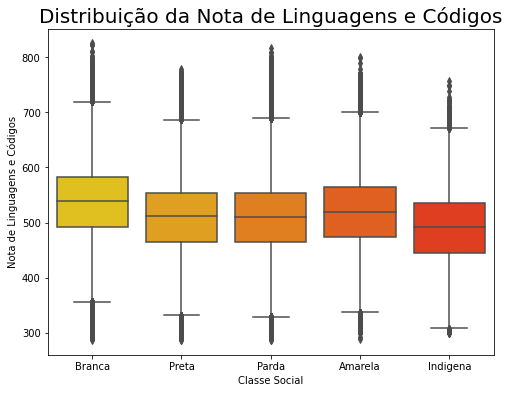

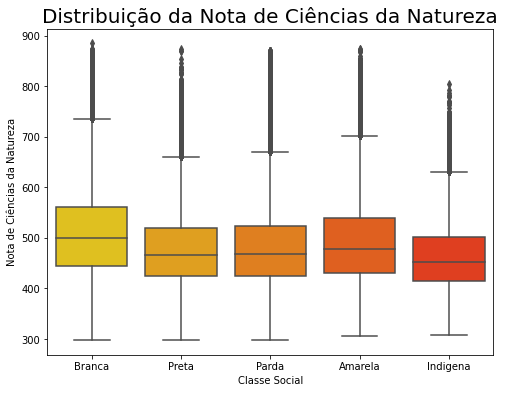

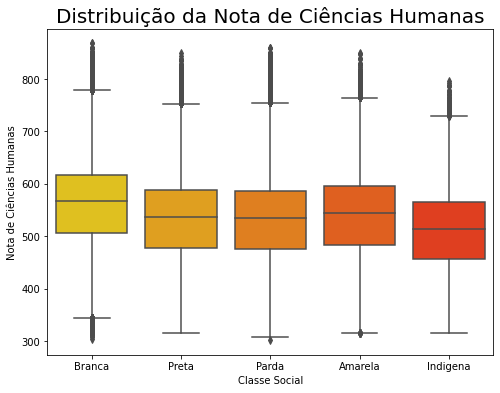

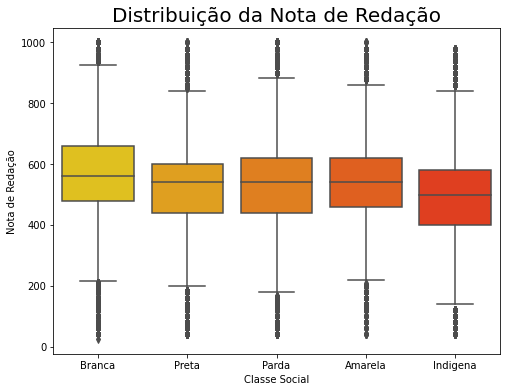

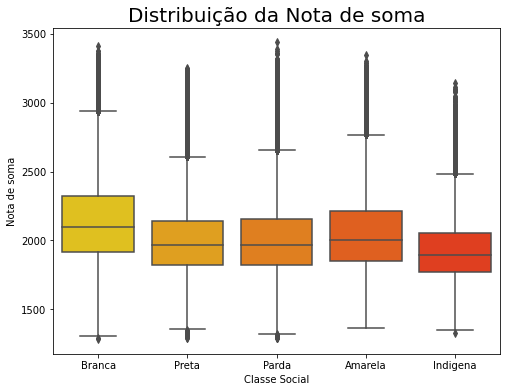

In [ ]:
ESCOLA = E2.query("TP_COR_RACA >0" )
raça = ['Branca','Preta', 'Parda','Amarela','Indigena']
def escola_boxplot(data,y,title,ylabel):
  plt.figure(figsize=(8,6))
  ax = sns.boxplot(data=data, x='TP_COR_RACA', 
                  y=y,palette='autumn_r')
  ax.set_title(title, fontsize=20)
  ax.set_ylabel(ylabel)
  ax.set_xlabel('Classe Social');
  ax.set_xticklabels( (raça) )

provas_sigla = {'MT': 'Matemática', 
          'LC': 'Linguagens e Códigos', 
          'CN': 'Ciências da Natureza', 
          'CH': 'Ciências Humanas',
          'REDACAO': 'Redação', 'SOMA': 'soma'} 

for sigla, nome in zip(provas_sigla.keys(), provas_sigla.values()):
  escola_boxplot(ESCOLA, f'NU_NOTA_{sigla}', f'Distribuição da Nota de {nome}', f'Nota de {nome}')

#### ORGANIZAR POR MEDIA DE NOTAS POR RAÇA ANO A ANO

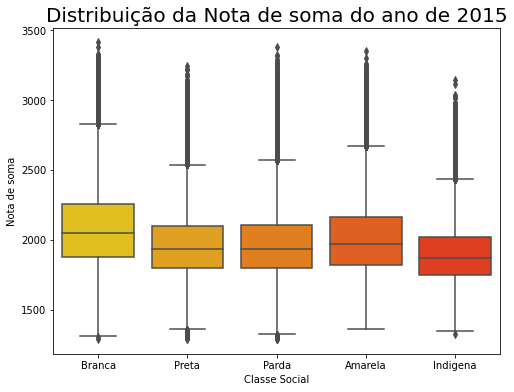

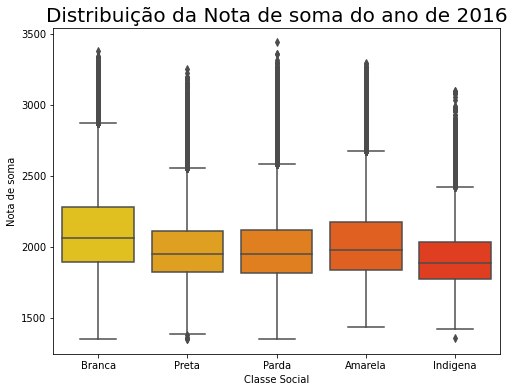

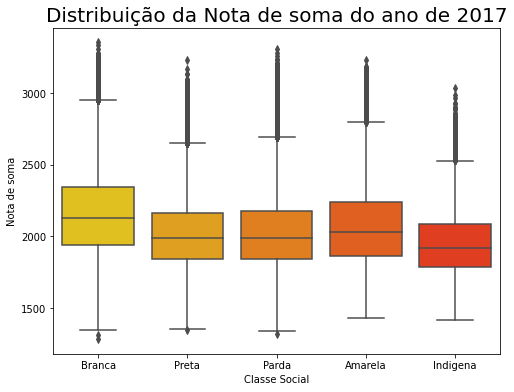

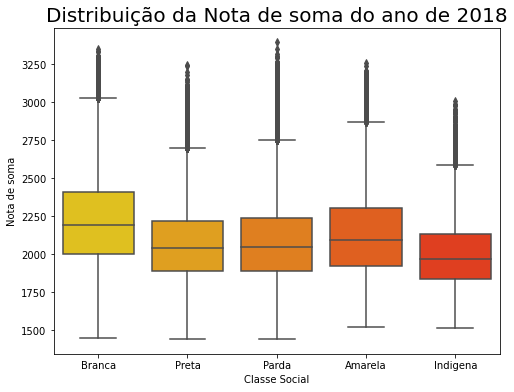

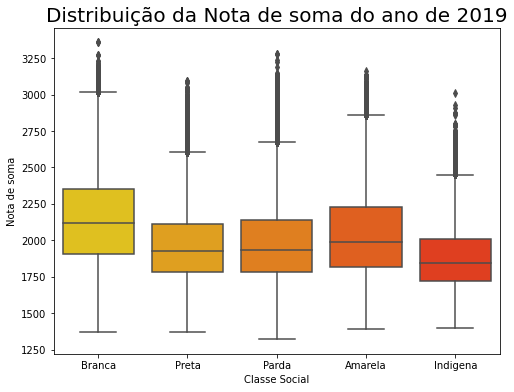

In [ ]:
ESCOLA = E2.query("TP_COR_RACA >0" )
ESCOLA = ESCOLA[['NU_ANO','TP_COR_RACA','NU_NOTA_SOMA']]
raça = ['Branca','Preta', 'Parda','Amarela','Indigena']
def escola_boxplot(data,y,title,ylabel):
  plt.figure(figsize=(8,6))
  ax = sns.boxplot(data=data, x='TP_COR_RACA', 
                  y=y,palette='autumn_r')
  ax.set_title(title, fontsize=20)
  ax.set_ylabel(ylabel)
  ax.set_xlabel('Classe Social');
  ax.set_xticklabels( (raça) )

provas_sigla = {'SOMA': 'soma'}
ano = [2015,2016,2017,2018,2019] 

for i in range(5):
 ESCOLAANO = ESCOLA.query("NU_ANO == @ano[@i]")
 for sigla, nome in zip(provas_sigla.keys(), provas_sigla.values()):
   escola_boxplot(ESCOLAANO, f'NU_NOTA_{sigla}', f'Distribuição da Nota de {nome} do ano de {ano[i]}' ,f'Nota de {nome}')

In [ ]:
ESCOLA.groupby(["NU_ANO","TP_COR_RACA"]).mean()

NU_NOTA_SOMA
NU_ANO TP_COR_RACA              
2015   1             2083.982025
       2             1962.063633
       3             1969.490669
       4             2016.898064
       5             1901.512620
2016   1             2103.062950
       2             1982.260109
       3             1986.497405
       4             2029.050468
       5             1919.307103
2017   1             2152.643237
       2             2015.416101
       3             2024.691594
       4             2072.657760
       5             1951.940469
2018   1             2215.048262
       2             2068.897336
       3             2081.483764
       4             2135.026135
       5             2001.948558
2019   1             2134.174784
       2             1961.453066
       3             1976.179842
       4             2041.832852
       5             1883.173510

In [ ]:
ESCOLA = E2.query("TP_ESCOLA >1 & TP_ESCOLA <=3" )
ensino1 = ESCOLA["TP_ESCOLA"].value_counts(normalize=True).index
ensino2 = ESCOLA["TP_ESCOLA"].value_counts(normalize=True).values

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(ensino2, labels=['Pública', 'Particular'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
ax1.axis('equal') 
plt.title("Tipo de escola dos candidatos")
plt.show()

In [ ]:
E2

,NU_ANO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_RENDA_FAMILIAR,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC,TP_ESCOLA,NU_NOTA_SOMA
0,2015,1,657,705,732,591,E,760,1,1,1,1,1,2685
2,2015,2,528,531,566,511,E,640,1,1,1,1,1,2136
4,2015,3,679,730,732,621,D,800,1,1,1,1,1,2762
5,2015,1,598,658,576,579,D,480,1,1,1,1,1,2411
6,2015,1,652,671,685,609,C,820,1,1,1,1,2,2617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095261,2019,2,486,457,488,506,E,280,1,1,1,1,1,1937
5095262,2019,2,454,542,504,599,E,400,1,1,1,1,1,2099
5095263,2019,3,450,469,552,515,E,580,1,1,1,1,1,1986
5095268,2019,1,458,380,396,493,C,800,1,1,1,1,1,1727
